In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
df_sunspots = pd.read_csv('/content/drive/MyDrive/Courses/phy508/sunspots.csv')


In [ ]:
print(df_sunspots)



       Unnamed: 0  Year  Month  Day  Date In Fraction Of Year  \
0               0  1818      1    1                  1818.001   
1               1  1818      1    2                  1818.004   
2               2  1818      1    3                  1818.007   
3               3  1818      1    4                  1818.010   
4               4  1818      1    5                  1818.012   
...           ...   ...    ...  ...                       ...   
73713       73713  2019     10   27                  2019.821   
73714       73714  2019     10   28                  2019.823   
73715       73715  2019     10   29                  2019.826   
73716       73716  2019     10   30                  2019.829   
73717       73717  2019     10   31                  2019.832   

       Number of Sunspots  Standard Deviation  Observations  Indicator  
0                      -1                -1.0             0          1  
1                      -1                -1.0             0          1  


In [ ]:
df = pd.DataFrame(df_sunspots,columns=['Date In Fraction Of Year','Number of Sunspots'])
print(df)

       Date In Fraction Of Year  Number of Sunspots
0                      1818.001                  -1
1                      1818.004                  -1
2                      1818.007                  -1
3                      1818.010                  -1
4                      1818.012                  -1
...                         ...                 ...
73713                  2019.821                   0
73714                  2019.823                   0
73715                  2019.826                   0
73716                  2019.829                   0
73717                  2019.832                   0

[73718 rows x 2 columns]


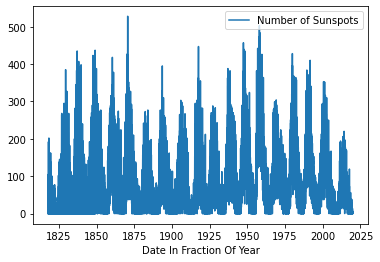

In [ ]:
df_sunspots.plot(x='Date In Fraction Of Year',y='Number of Sunspots',kind = 'line')

In [ ]:
yr = df_sunspots[['Date In Fraction Of Year']].to_numpy() 
ns = df_sunspots[['Number of Sunspots']].to_numpy() 
Np = yr.shape[0]
print(Np)

73718


Text(0, 0.5, 'sunspot total')

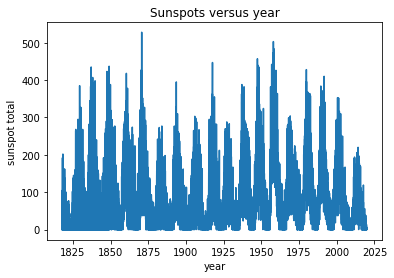

In [ ]:
plt.plot(yr,ns)
plt.title("Sunspots versus year")
plt.xlabel("year")
plt.ylabel("sunspot total")

(0.0, 0.3)

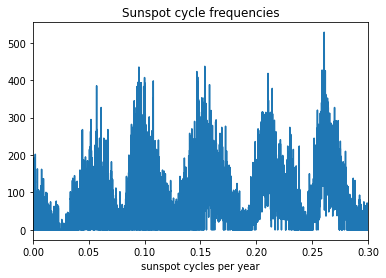

In [ ]:
sf = fft(ns)[1:Np//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
xf = fftfreq(Np,1)[1:Np//2] # arguments are sample number, sample dt, &  remove mirror
plt.title("Sunspot cycle frequencies")
plt.plot(xf, np.abs(sf))   # magnitude of complex fy
plt.xlabel("sunspot cycles per year")
plt.xlim(0.0,0.3)